# Matplotlib 101

In [1]:
# Assoc. Prof. Dr. Piyabute Fuangkhon
# Department of Digital Business Management
# Martin de Tours School of Management and Economics
# Assumption University
# Update: 22/05/2024

In [17]:
!source /home/piyabute/jupyter/venv/bin/activate && pip install pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.1 MB/s eta 0:00:00ta 0:00:01


# Introduction to Matplotlib 101 (Visualizing COVID-19 Data)

In this notebook, we will explore the basics of Matplotlib while visualizing data from the OWID COVID-19 dataset. We will cover various types of plots including line plots, bar plots, scatter plots, histograms, and more.

In [5]:
# Global file location
file_location = 'owid-covid-data.csv'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_location)
df['date'] = pd.to_datetime(df['date'])
df.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan 2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan 2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan 2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan 2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                   37.75                         0.5   
1           NaN                   37.75                         0.5   
2           NaN                   37.75                         0.5   
3           NaN                   37.75                         0.5   
4           NaN                   37.75                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                     0.51    41128772   
1            64.83                     0.51    41128772   
2            64.83                     0.51    41128772   
3            64.83                     0.51    41128772   
4            64.83                     0.51    41128772   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

## Line Plot
Let's start with a simple line plot to visualize the daily new COVID-19 cases in the United States.

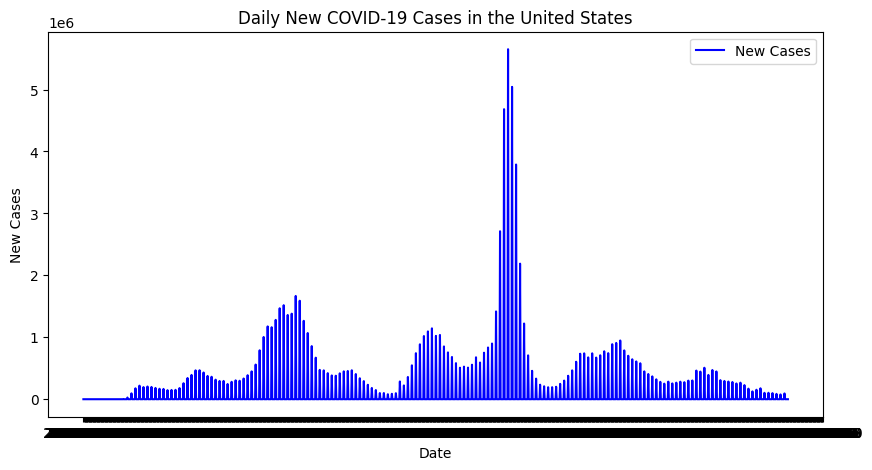

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_location)

# Filter data for the United States
us_data = df[df['location'] == 'United States']

# Plot daily new cases
plt.figure(figsize=(10, 5))
plt.plot(us_data['date'], us_data['new_cases'], label='New Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New COVID-19 Cases in the United States')
plt.legend()
plt.show()

## Bar Plot
Next, let's create a bar plot to compare the total number of COVID-19 cases for each continent.

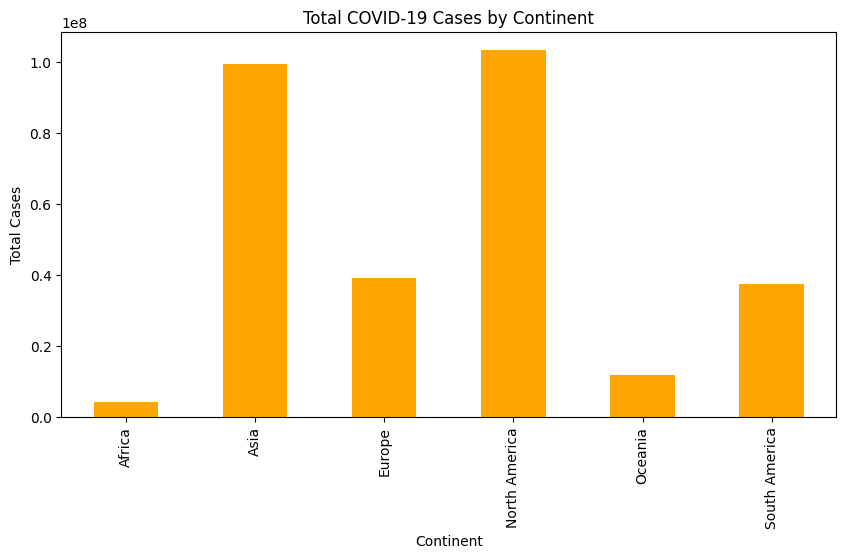

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_location)

# Group data by continent and get the maximum total cases
continent_cases = df.groupby('continent')['total_cases'].max().dropna()

# Plot the bar chart
plt.figure(figsize=(10, 5))
continent_cases.plot(kind='bar', color='orange')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by Continent')
plt.show()

## Scatter Plot
Now, let's generate a scatter plot to show the relationship between total COVID-19 cases and total deaths for each country.

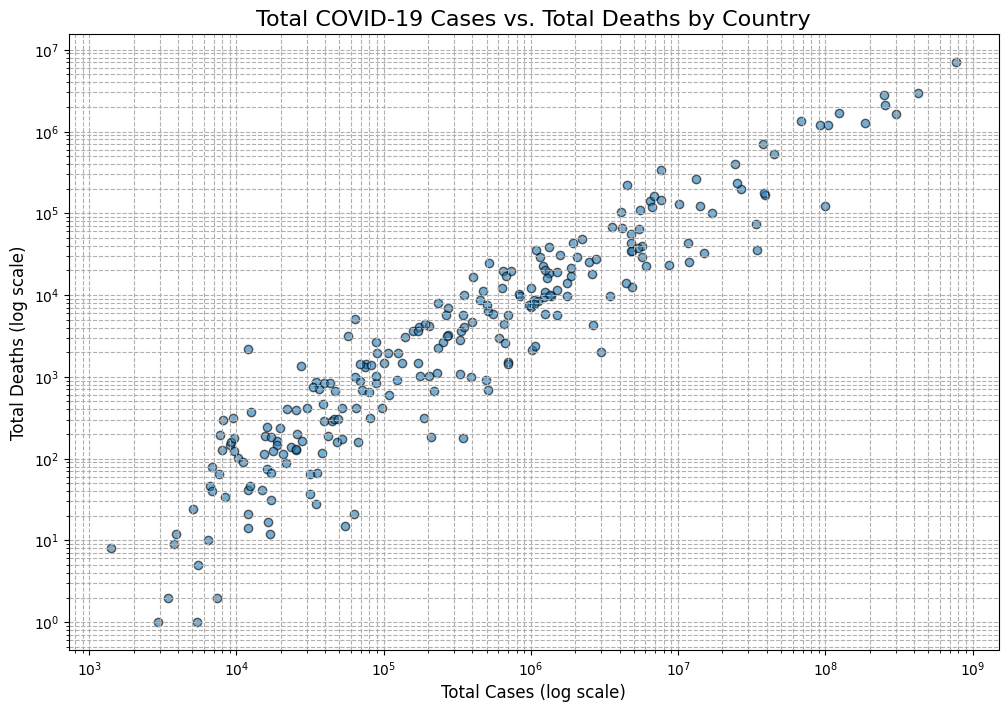

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_covid_cases_vs_deaths(file_path='owid-covid-data.csv'):
    """
    Generates a scatter plot showing the relationship between total COVID-19
    cases and total deaths for each country.

    Args:
        file_path (str): The path to the 'owid-covid-data.csv' file.
    """
    try:
        # Load the dataset
        df = pd.read_csv(file_path)

        # The dataset is time-series, so we need to get the final total for each country.
        # Group by 'location' (country) and get the maximum value for total cases and total deaths.
        # This will give us the final cumulative numbers for each country.
        latest_data = df.groupby('location')[['total_cases', 'total_deaths']].max().reset_index()

        # Remove rows where either total_cases or total_deaths is zero,
        # as these would cause issues with the logarithmic scale.
        latest_data = latest_data[(latest_data['total_cases'] > 0) & (latest_data['total_deaths'] > 0)]

        # Create the scatter plot
        plt.figure(figsize=(12, 8))
        plt.scatter(
            latest_data['total_cases'],
            latest_data['total_deaths'],
            alpha=0.6,
            edgecolors='k'
        )

        # Apply a log scale to both axes. This is crucial because the numbers
        # for different countries vary by several orders of magnitude, and a
        # linear scale would make most data points unreadable.
        plt.xscale('log')
        plt.yscale('log')

        # Add titles and labels for clarity
        plt.title('Total COVID-19 Cases vs. Total Deaths by Country', fontsize=16)
        plt.xlabel('Total Cases (log scale)', fontsize=12)
        plt.ylabel('Total Deaths (log scale)', fontsize=12)
        plt.grid(True, which="both", ls="--")

        # Display the plot
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please ensure it is in the same directory.")
    except KeyError:
        print("Error: Required columns ('location', 'total_cases', 'total_deaths') not found in the CSV.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # You can specify the file path here.
    # If the CSV is in the same folder, just use the filename.
    # Otherwise, provide the full path to the file.
    plot_covid_cases_vs_deaths()


## Histogram
Let's create a histogram to visualize the distribution of daily new cases globally.

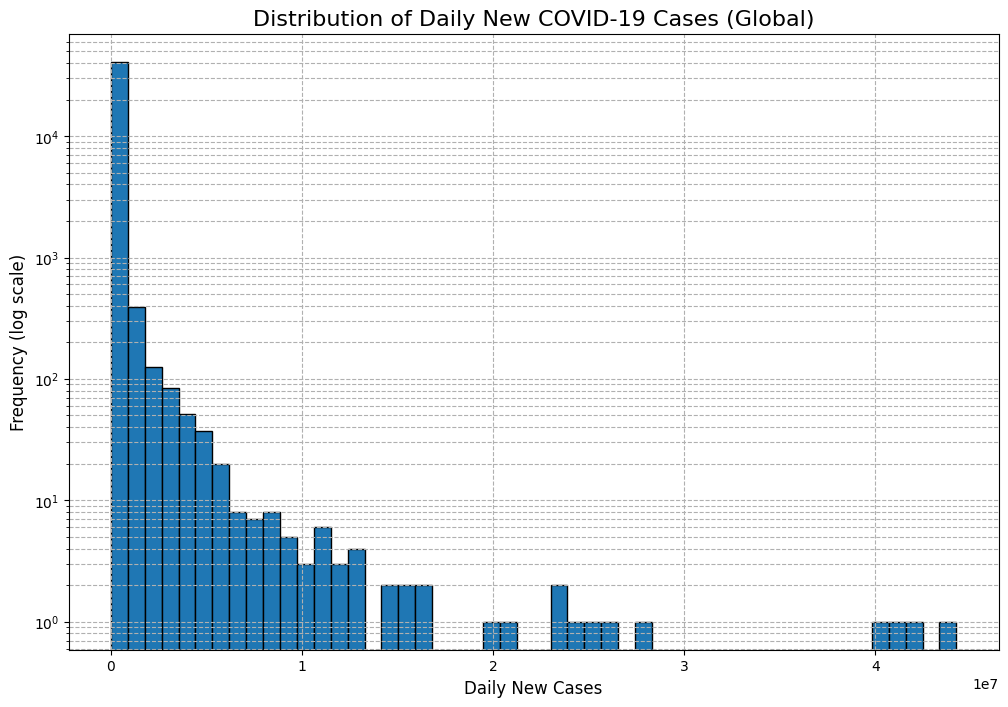

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_daily_new_cases_histogram(file_path='owid-covid-data.csv'):
    """
    Generates a histogram to visualize the distribution of daily new COVID-19
    cases globally.

    Args:
        file_path (str): The path to the 'owid-covid-data.csv' file.
    """
    try:
        # Load the dataset
        df = pd.read_csv(file_path)

        # Select the 'new_cases' column and drop any rows with NaN values.
        # It's important to also filter out any negative values, as they
        # can appear in the dataset due to data corrections.
        daily_cases = df['new_cases'].dropna()
        daily_cases = daily_cases[daily_cases > 0]

        # Create the histogram
        plt.figure(figsize=(12, 8))
        
        # Use a logarithmic y-axis to better visualize the frequency
        # distribution, as a small number of days have a very high number of
        # new cases, while most days have a low number.
        plt.hist(daily_cases, bins=50, edgecolor='black', log=True)

        # Add titles and labels for clarity
        plt.title('Distribution of Daily New COVID-19 Cases (Global)', fontsize=16)
        plt.xlabel('Daily New Cases', fontsize=12)
        plt.ylabel('Frequency (log scale)', fontsize=12)
        plt.grid(True, which="both", ls="--")

        # Display the plot
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please ensure it is in the same directory.")
    except KeyError:
        print("Error: Required column ('new_cases') not found in the CSV.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # You can specify the file path here.
    # If the CSV is in the same folder, just use the filename.
    # Otherwise, provide the full path to the file.
    plot_daily_new_cases_histogram()


## Box Plot
Let's compare the distribution of daily new cases per continent using a box plot.

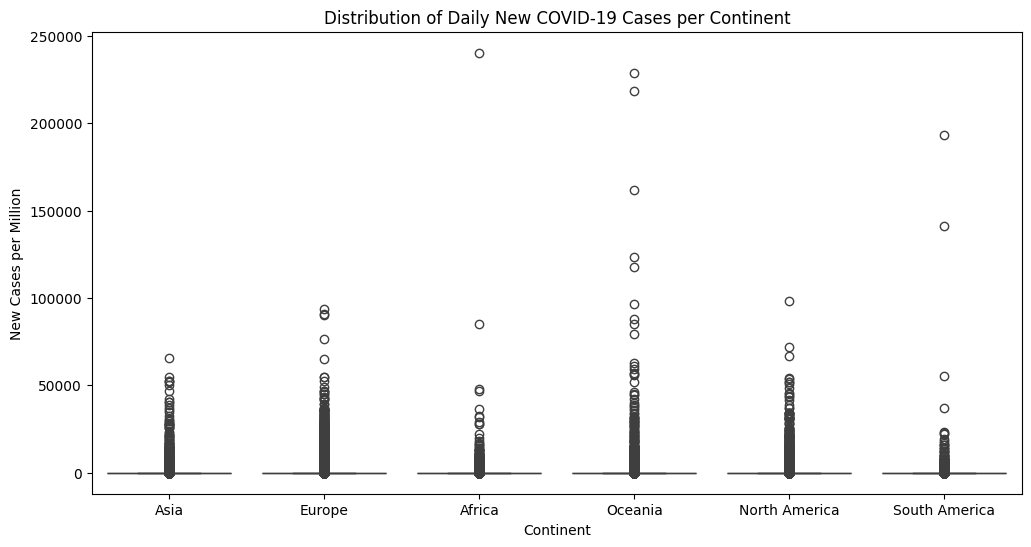

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(file_location)

# Prepare data for box plot
df['new_cases_per_million'] = df['new_cases'] / df['population'] * 1e6
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='new_cases_per_million', data=df)
plt.xlabel('Continent')
plt.ylabel('New Cases per Million')
plt.title('Distribution of Daily New COVID-19 Cases per Continent')
plt.show()

## Pie Chart
Finally, let's create a pie chart showing the proportion of total COVID-19 deaths by continent.

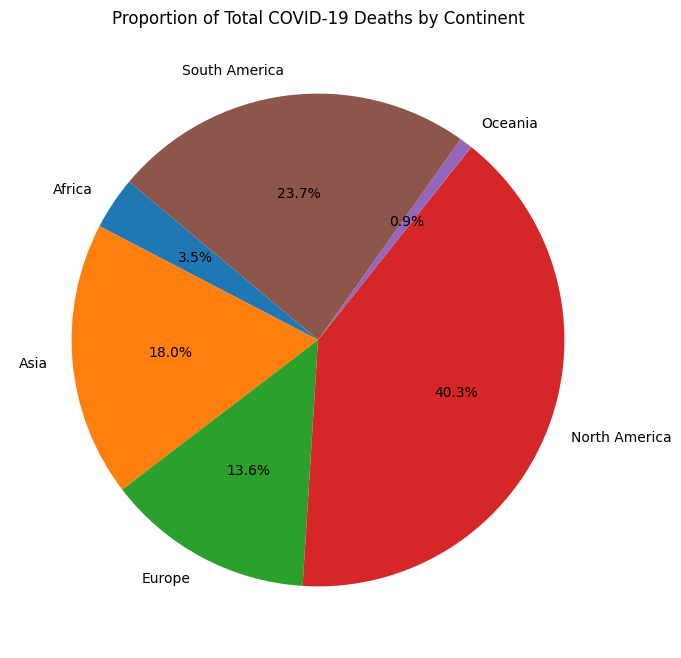

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_location)

# Group data by continent and get the maximum total deaths
continent_deaths = df.groupby('continent')['total_deaths'].max().dropna()

# Plot the pie chart
plt.figure(figsize=(8, 8))
continent_deaths.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Proportion of Total COVID-19 Deaths by Continent')
plt.show()

## Advanced Line Plot with Moving Averages and Annotations
This example plots daily new cases for multiple countries with moving averages and annotations for significant business events.

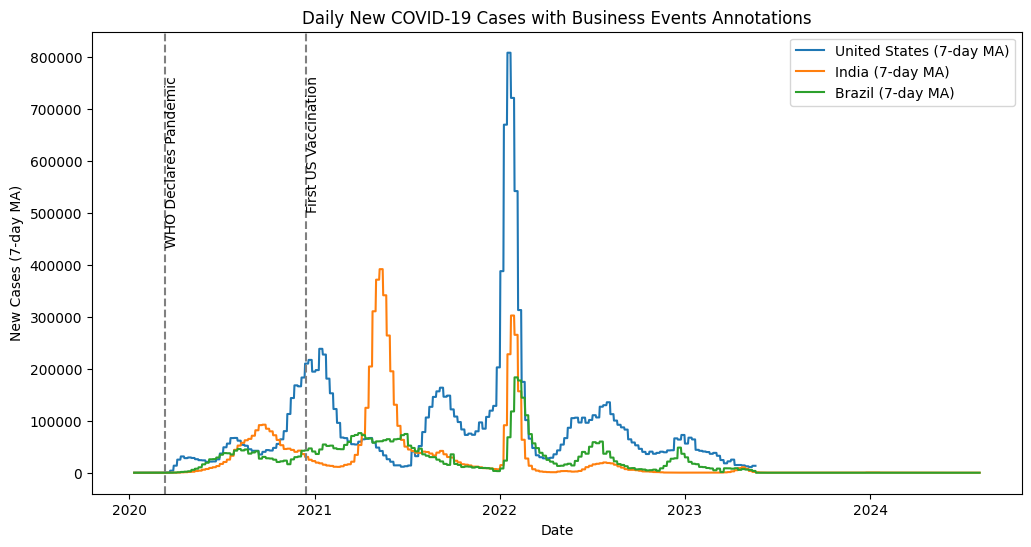

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_location)
df['date'] = pd.to_datetime(df['date'])

# Select countries for comparison
countries = ['United States', 'India', 'Brazil']
filtered_data = df[df['location'].isin(countries)]

# Plot the data
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'].rolling(window=7).mean(), label=f'{country} (7-day MA)')

# Add annotations for business events
business_events = {
    '2020-03-11': 'WHO Declares Pandemic',
    '2020-12-14': 'First US Vaccination'
}
for date, event in business_events.items():
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--')
    plt.text(pd.to_datetime(date), plt.ylim()[1] * 0.9, event, rotation=90, verticalalignment='top')

plt.xlabel('Date')
plt.ylabel('New Cases (7-day MA)')
plt.title('Daily New COVID-19 Cases with Business Events Annotations')
plt.legend()
plt.show()

## Grouped Bar Plot for Total Cases by Continent and Quarter
This example creates a grouped bar plot showing the total number of COVID-19 cases by continent for each quarter, useful for business trend analysis.

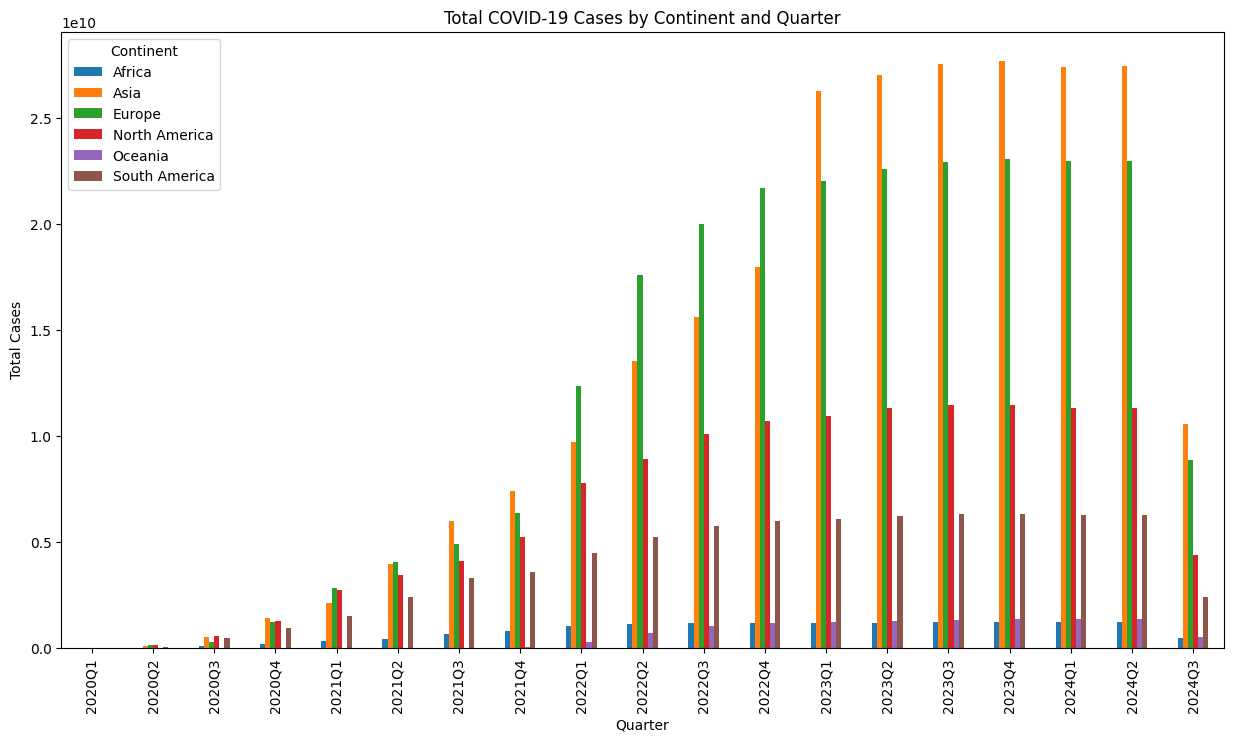

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_location)
df['date'] = pd.to_datetime(df['date'])
df['quarter'] = df['date'].dt.to_period('Q')

# Aggregate data by continent and quarter
continent_quarterly = df.groupby(['continent', 'quarter'])['total_cases'].sum().unstack().fillna(0)

# Plot the grouped bar plot
continent_quarterly.T.plot(kind='bar', stacked=False, figsize=(15, 8))
plt.xlabel('Quarter')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by Continent and Quarter')
plt.legend(title='Continent')
plt.show()

## Scatter Plot with Bubble Sizes Representing Population
This example generates a scatter plot showing the relationship between total cases and total deaths with bubble sizes representing population size.

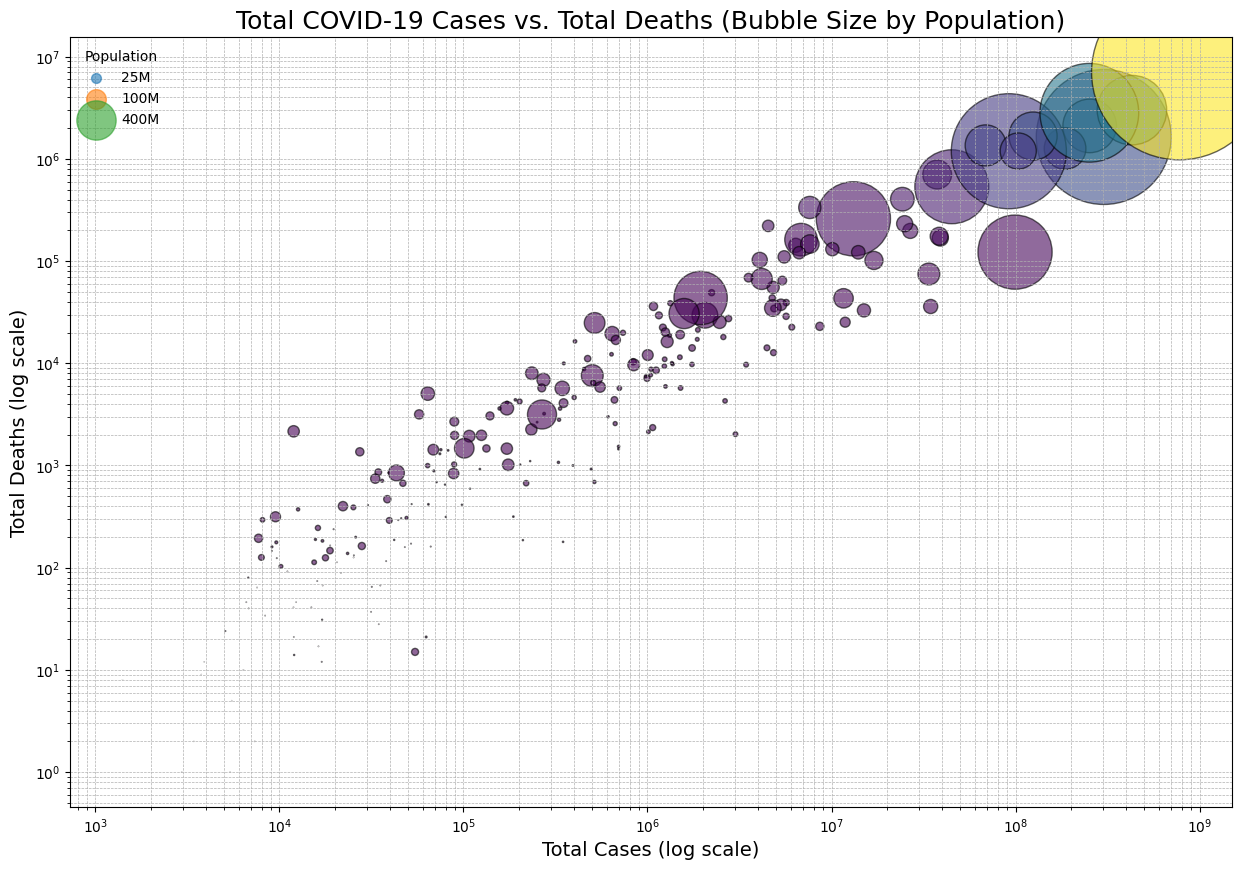

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_covid_cases_vs_deaths_bubble(file_path='owid-covid-data.csv'):
    """
    Generates a bubble chart showing the relationship between total COVID-19
    cases and total deaths for each country, with bubble sizes representing
    the population.

    Args:
        file_path (str): The path to the 'owid-covid-data.csv' file.
    """
    try:
        # Load the dataset
        df = pd.read_csv(file_path)

        # Get the latest data for each country by taking the max values
        # of the relevant columns.
        latest_data = df.groupby('location').agg({
            'total_cases': 'max',
            'total_deaths': 'max',
            'population': 'max'
        }).reset_index()

        # Remove rows with zero or missing values for a cleaner plot.
        latest_data = latest_data.dropna(subset=['total_cases', 'total_deaths', 'population'])
        latest_data = latest_data[(latest_data['total_cases'] > 0) & (latest_data['total_deaths'] > 0) & (latest_data['population'] > 0)]

        # Set bubble sizes based on population. The size is scaled to make the
        # bubbles a reasonable size for the plot.
        sizes = latest_data['population'] / 500000

        # Create the scatter plot with bubble sizes
        plt.figure(figsize=(15, 10))
        plt.scatter(
            latest_data['total_cases'],
            latest_data['total_deaths'],
            s=sizes,  # Set the bubble size
            alpha=0.6,
            edgecolors='k',
            c=latest_data['total_deaths'], # Color the bubbles by total deaths
            cmap='viridis'
        )

        # Use log scales on both axes to manage the wide range of data.
        plt.xscale('log')
        plt.yscale('log')

        # Add titles and labels
        plt.title('Total COVID-19 Cases vs. Total Deaths (Bubble Size by Population)', fontsize=18)
        plt.xlabel('Total Cases (log scale)', fontsize=14)
        plt.ylabel('Total Deaths (log scale)', fontsize=14)
        plt.grid(True, which="both", ls="--", linewidth=0.5)
        
        # Add a legend for the bubble sizes
        legend_elements = [plt.scatter([], [], s=size, label=f'{pop / 1e6:.0f}M', alpha=0.6)
                           for size, pop in zip([50, 200, 800], [25000000, 100000000, 400000000])]
        plt.legend(handles=legend_elements, title='Population', scatterpoints=1, frameon=False)

        # Display the plot
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please ensure it is in the same directory.")
    except KeyError:
        print("Error: Required columns not found in the CSV. Please ensure 'location', 'total_cases', 'total_deaths', and 'population' exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # If the CSV is in the same folder, just use the filename.
    # Otherwise, provide the full path to the file.
    plot_covid_cases_vs_deaths_bubble()


## Histogram with Log Scale
This example creates a histogram for daily new cases globally and applies a log scale to better visualize the distribution.

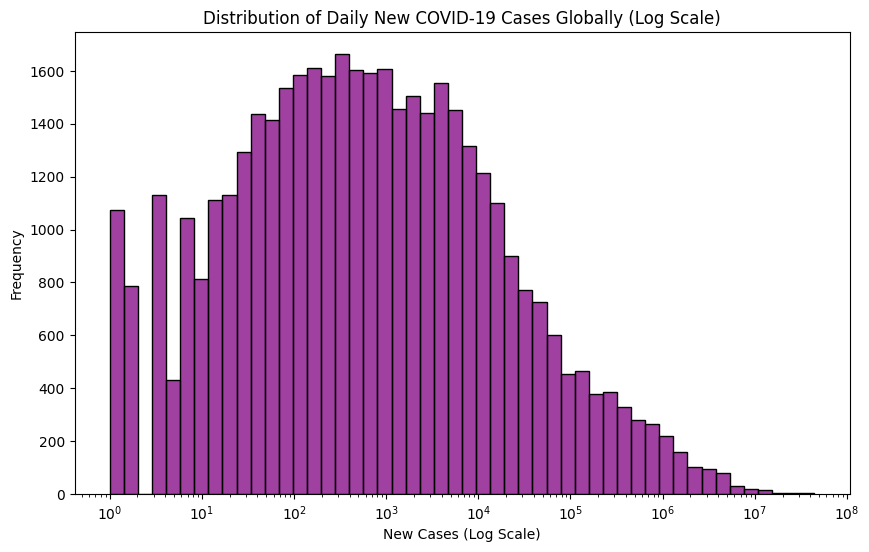

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(file_location)

# Plot the histogram with log scale
plt.figure(figsize=(10, 6))
sns.histplot(df['new_cases'].dropna(), bins=50, color='purple', log_scale=True)
plt.xlabel('New Cases (Log Scale)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily New COVID-19 Cases Globally (Log Scale)')
plt.show()

## Box Plot with Points Overlayed by Continent
This example creates a box plot to compare the distribution of daily new cases per continent and overlays points colored by continent.

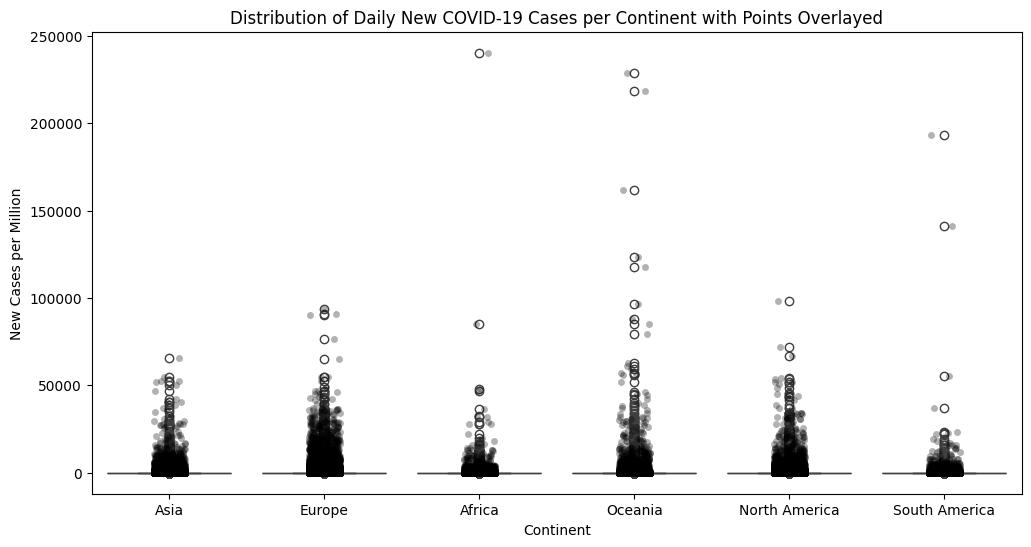

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(file_location)
df['new_cases_per_million'] = df['new_cases'] / df['population'] * 1e6

# Plot the box plot with points overlayed
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='new_cases_per_million', data=df)
sns.stripplot(x='continent', y='new_cases_per_million', data=df, color='black', alpha=0.3, jitter=True)
plt.xlabel('Continent')
plt.ylabel('New Cases per Million')
plt.title('Distribution of Daily New COVID-19 Cases per Continent with Points Overlayed')
plt.show()

## Donut Pie Chart for Vaccine Distribution
This example creates a donut pie chart showing the proportion of total vaccinations by continent.

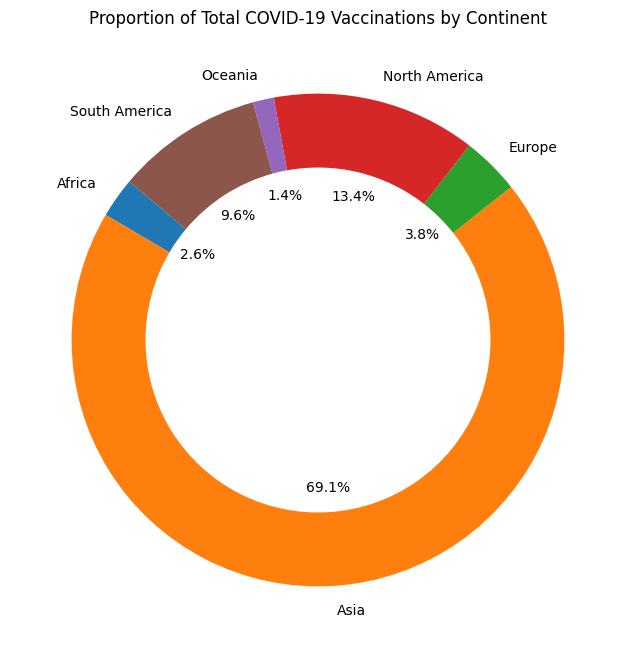

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_location)

# Group data by continent and get the maximum total vaccinations
continent_vaccinations = df.groupby('continent')['total_vaccinations'].max().dropna()

# Plot the donut pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_vaccinations, labels=continent_vaccinations.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Proportion of Total COVID-19 Vaccinations by Continent')
plt.show()